In [2]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

Saving datafile.xlsx to datafile.xlsx


In [5]:
import pandas as pd
import numpy as np
df=pd.read_excel('datafile.xlsx')
print(df.dtypes)

Rating                  int64
Operator               object
In Out Travelling      object
Network Type           object
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [6]:
import io

In [7]:
df.head()

,Rating,Operator,In Out Travelling,Network Type,Call Drop Category,Latitude,Longitude,State Name
0,1,Airtel,Indoor,4G,Poor Voice Quality,-1.000000,-1.000000,NaN
1,1,Airtel,Outdoor,4G,Call Dropped,-1.000000,-1.000000,NaN
2,1,Airtel,Travelling,4G,Call Dropped,-1.000000,-1.000000,NaN
3,5,RJio,Indoor,4G,Satisfactory,19.871658,75.542397,Maharashtra
4,1,BSNL,Indoor,3G,Call Dropped,16.437764,80.997508,Andhra Pradesh


In [8]:
df.shape
# rows and columns

(9734, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              9734 non-null   int64  
 1   Operator            9734 non-null   object 
 2   In Out Travelling   9734 non-null   object 
 3   Network Type        9734 non-null   object 
 4   Call Drop Category  9734 non-null   object 
 5   Latitude            9734 non-null   float64
 6   Longitude           9734 non-null   float64
 7   State Name          6077 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 608.5+ KB


In [10]:
print(df.dtypes)

Rating                  int64
Operator               object
In Out Travelling      object
Network Type           object
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [11]:
df.describe

<bound method NDFrame.describe of       Rating Operator In Out Travelling  ...   Latitude  Longitude      State Name
0          1   Airtel            Indoor  ...  -1.000000  -1.000000             NaN
1          1   Airtel           Outdoor  ...  -1.000000  -1.000000             NaN
2          1   Airtel        Travelling  ...  -1.000000  -1.000000             NaN
3          5     RJio            Indoor  ...  19.871658  75.542397     Maharashtra
4          1     BSNL            Indoor  ...  16.437764  80.997508  Andhra Pradesh
...      ...      ...               ...  ...        ...        ...             ...
9729       4   Airtel            Indoor  ...  24.097278  88.252728     West Bengal
9730       2     RJio            Indoor  ...  -1.000000  -1.000000             NaN
9731       5     Idea            Indoor  ...  -1.000000  -1.000000             NaN
9732       4     RJio           Outdoor  ...  22.820775  70.862170         Gujarat
9733       5     RJio           Outdoor  ...  22.8206

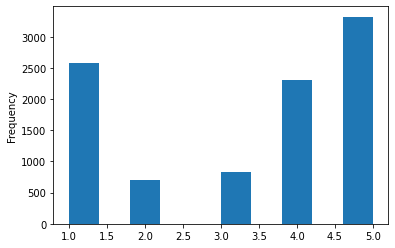

In [12]:
# it shows the distribution of "Rating".
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import *

df['Rating'].plot(kind="hist")

In [13]:
#correlation between "Rating" and "Latitude"
import numpy as np

rLatitude = np.corrcoef(df['Rating'], df['Latitude'])
rLatitude

array([[1.        , 0.14131879],
       [0.14131879, 1.        ]])

In [14]:
#correlation between "Rating" and "Longitude"
import numpy as np

rLongitude = np.corrcoef(df['Rating'], df['Longitude'])
rLongitude

array([[1.       , 0.2133563],
       [0.2133563, 1.       ]])

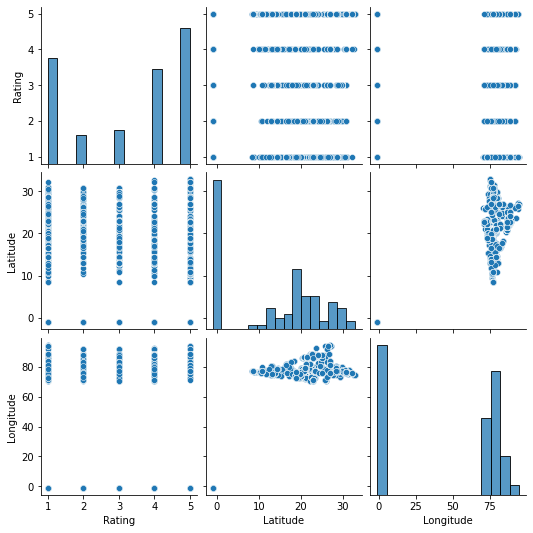

In [16]:
# it illustrates one column (numberical) against another column (numberical). it can aldo be used to show the correlation between columns. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

In [18]:
#A list of categorical columns
cat_cols=["Operator","In Out Travelling","Network Type","Call Drop Category"]

In [20]:
# below features are removed from the dataframe because each of them has a low correlation with "Rating". If they were included, accuracy would be lower.
dfdropcol=df.drop(columns=['Latitude','Longitude','State Name'])

# Create a copy of the data frame
df_onehot=dfdropcol.copy()

#convert only categorical variables to one-hot features
df_onehot = pd.get_dummies(dfdropcol, columns=cat_cols, prefix = cat_cols)

#print the dataset
df_onehot

,Rating,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Indoor,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_2G,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Call Dropped,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,5,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,4,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
9730,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
9731,5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
9732,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [23]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Rating"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=100) 
# 70% training and 30% test

In [34]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model
nb.fit(X_train, y_train)

#Predict
y_pred = nb.predict(X_test)

In [35]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)

Number of features used  16
Classes  [1 2 3 4 5]
Number of records for classes  [1818.  482.  572. 1633. 2308.]


In [36]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
#tn, fp, fn, tp=cf.ravel()
#print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[739  20   0   0   0]
 [198  26   0   0   0]
 [ 98   5   0  26 125]
 [  0   0   0 278 394]
 [  0   0   0 192 820]]


In [38]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.97      0.82       759
           2       0.51      0.12      0.19       224
           3       0.00      0.00      0.00       254
           4       0.56      0.41      0.48       672
           5       0.61      0.81      0.70      1012

    accuracy                           0.64      2921
   macro avg       0.48      0.46      0.44      2921
weighted avg       0.57      0.64      0.58      2921



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)